In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from pygridfit import GridFit, TiledGridFit
from scipy.interpolate import griddata


This notbook replicates the [examples](https://www.mathworks.com/matlabcentral/fileexchange/8998-surface-fitting-using-gridfit) of the MATALB `gridfit` (D'Errico, 2006).

## Topographic data

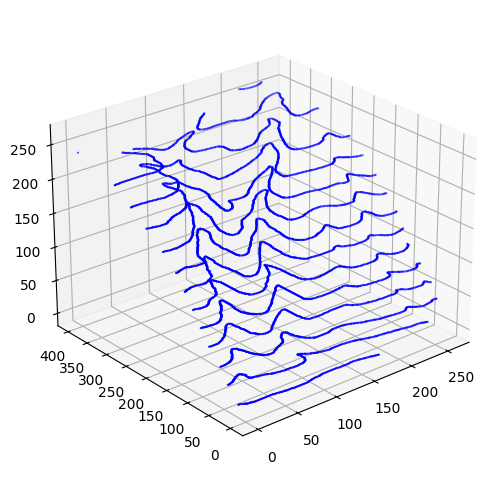

In [2]:
bluff_data = scipy.io.loadmat('../tests/data/bluff_data.mat')
x = bluff_data["x"].flatten()
y = bluff_data["y"].flatten()
z = bluff_data["z"].flatten()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='.', s=1)
ax.view_init(elev=25, azim=230)


In [3]:
gx = np.arange(0, 268, 4)
gy = np.arange(0, 404, 4)

g = GridFit(x, y, z, gx, gy).fit()

Text(0.5, 0.92, 'Use topographic contours to recreate a surface')

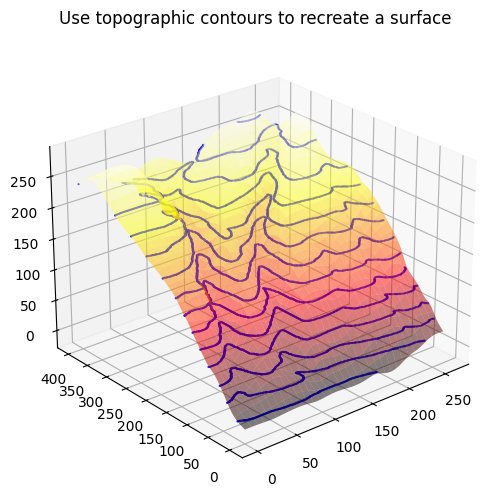

In [4]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='.', s=1)
ax.plot_surface(g.xgrid, g.ygrid, g.zgrid, cmap='hot', alpha=0.5)
ax.view_init(elev=25, azim=230)
ax.set_title("Use topographic contours to recreate a surface")

## Fitting a trigonometric surface

In [5]:
np.random.seed(0)

n1 = 15
n2 = 15

theta = np.random.rand(n1, 1) * (np.pi / 2)

r = np.random.rand(1, n2)

x = np.cos(theta) * r
y = np.sin(theta) * r

x = x.ravel()
y = y.ravel()

x = np.concatenate([
    np.array([0, 0, 1, 1], dtype=float), 
    x, 
    x, 
    1 - x, 
    1 - x
])
y = np.concatenate([
    np.array([0, 1, 0, 1], dtype=float), 
    y, 
    1 - y, 
    y, 
    1 - y
])


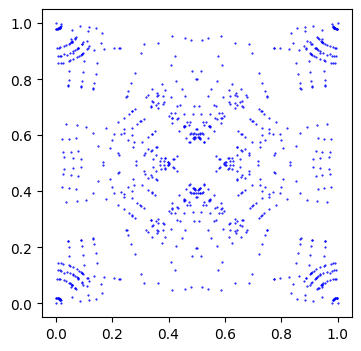

In [6]:
plt.figure(figsize=(4,4))
plt.scatter(x, y, c='b', marker='.', s=1)

In [7]:
z = np.sin(4 * x + 5 * y) * np.cos(7 * (x - y)) + np.exp(x + y)
xi = np.linspace(0, 1, 51)
xg, yg = np.meshgrid(xi, xi, indexing='xy')

In [8]:
zgd = griddata(np.column_stack((x, y)) , z, (xg, yg), method='linear')

gf = GridFit(x, y, z, xi, xi).fit()
zgf = gf.zgrid

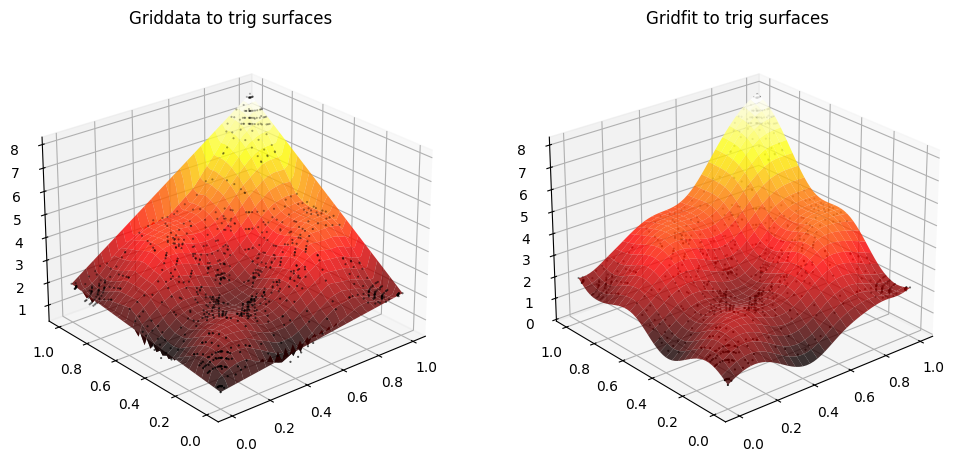

In [9]:
fig = plt.figure(figsize=(12, 6))

# Python version
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xg, yg, zgd, cmap='hot', alpha=0.8, linewidth=0)
ax1.scatter(x, y, z, c='black', marker='.', s=1)

ax1.set_title("Griddata to trig surfaces")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(xg, yg, zgf, cmap='hot', alpha=0.8, linewidth=0)
ax2.scatter(x, y, z, c='black', marker='.', s=1)
ax2.set_title("Gridfit to trig surfaces")

for ax in [ax1, ax2]:
    ax.view_init(elev=25, azim=230)

## The trig surface with highly different scalings on the x and y axes

In [10]:
xs = x/100
xis = xi/100

ys = y*100
yis = xi*100

xg, yg = np.meshgrid(xis, yis, indexing='xy')
zgd2 = griddata(np.column_stack((xs, ys)), z, (xg, yg), method='linear')

In [11]:
gf2 = GridFit(xs, ys, z, xis, yis).fit()
zgf2 = gf2.zgrid

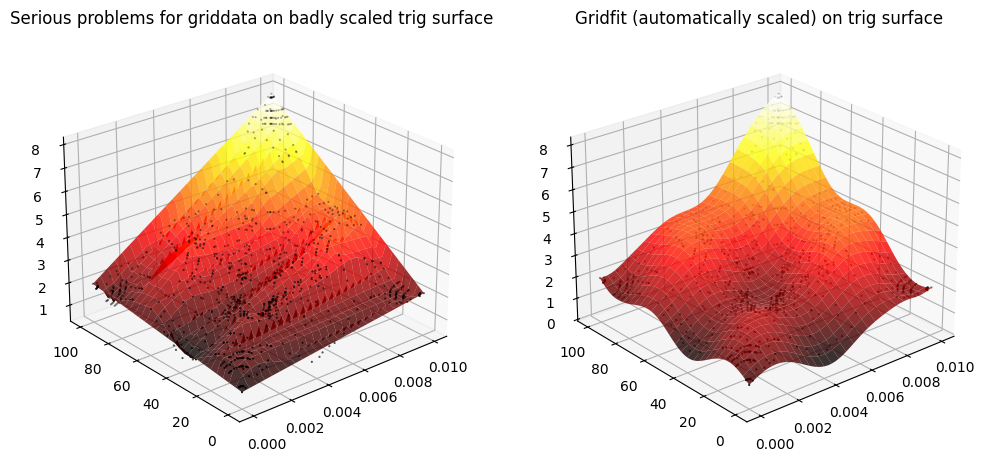

In [12]:
fig = plt.figure(figsize=(12, 6))

# Python version
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xg, yg, zgd2, cmap='hot', alpha=0.8, linewidth=0)
ax1.scatter(xs, ys, z, c='black', marker='.', s=1)

ax1.set_title("Serious problems for griddata on badly scaled trig surface")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(gf2.xgrid, gf2.ygrid, zgf2, cmap='hot', alpha=0.8, linewidth=0)
ax2.scatter(xs, ys, z, c='black', marker='.', s=1)

ax2.set_title("Gridfit (automatically scaled) on trig surface")

for ax in [ax1, ax2]:
    ax.view_init(elev=25, azim=230)

In [13]:
def peaks(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """
    Emulate MATLAB's built-in peaks function for elementwise x, y.
    Returns a NumPy array of the same shape as x (and y).
    """
    return (  3 * (1 - x)**2 * np.exp(-(x**2) - (y + 1)**2)
            - 10 * (x / 5 - x**3 - y**5) * np.exp(-x**2 - y**2)
            - (1/3)*np.exp(-(x+1)**2 - y**2) )

n = 100
x = (np.random.rand(n) - 0.5) * 6  # in MATLAB: (rand(n,1)-.5)*6
y = (np.random.rand(n) - 0.5) * 6

z = peaks(x, y)

xi = np.linspace(-3, 3, 101)
xg, yg = np.meshgrid(xi, xi, indexing='xy')

zpgd = griddata(
    points=(x, y),
    values=z,
    xi=(xg, yg),
    method='cubic'   # or 'cubic' / 'nearest'
)

pgf = GridFit(x, y, z, xi, xi).fit()
zpgf = pgf.zgrid

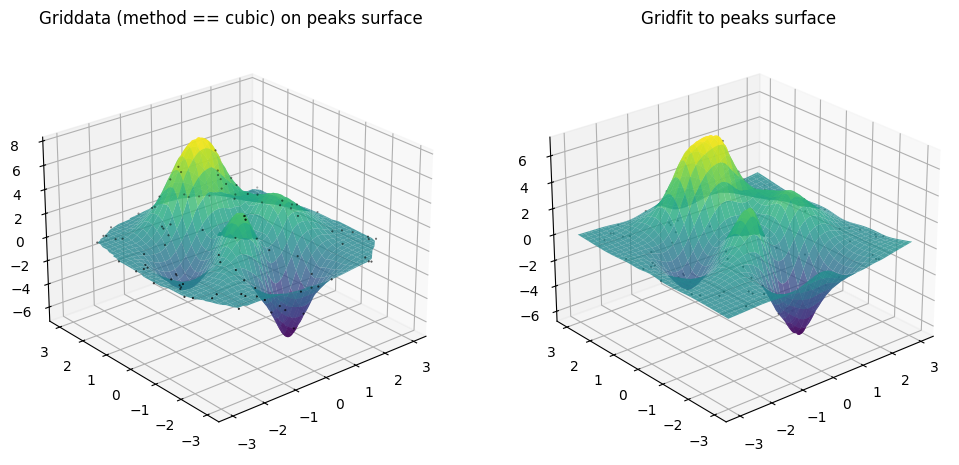

In [14]:
fig = plt.figure(figsize=(12, 6))

# Python version
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xg, yg, zpgd, cmap='viridis', alpha=0.8, linewidth=0)
ax1.scatter(x, y, z, c='black', marker='.', s=1)

ax1.set_title("Griddata (method == cubic) on peaks surface")

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(pgf.xgrid, pgf.ygrid, pgf.zgrid, cmap='viridis', alpha=0.8, linewidth=0)
ax2.scatter(x, y, z, c='black', marker='.', s=1)

ax2.set_title("Gridfit to peaks surface")

for ax in [ax1, ax2]:
    ax.view_init(elev=25, azim=230)

## Using tiles in gridfit

In [15]:
n = 100_000

x = np.random.rand(n)
y = np.random.rand(n)

z = x + y + np.sin((x**2 + y**2) * 10)

xnodes = np.linspace(0, 1, 801)
ynodes = xnodes

In [16]:
tgf = TiledGridFit(
    x, y, z,
    xnodes=xnodes,
    ynodes=ynodes,
    smoothness=15,
    interp="triangle",
    regularizer="gradient",
    solver="normal",
    tilesize=120,
    overlap=0.25,
).fit()

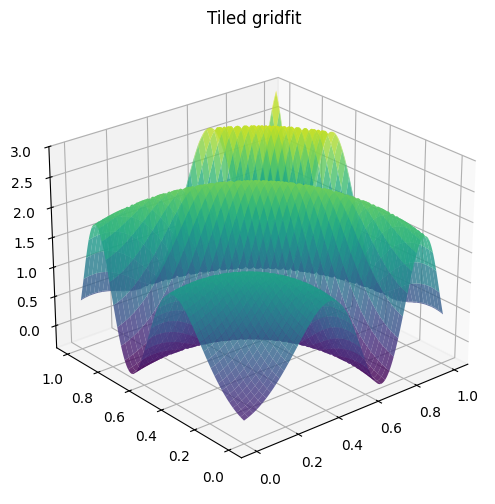

In [17]:
fig = plt.figure(figsize=(6, 6))

# Python version
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(tgf.xgrid, tgf.ygrid, tgf.zgrid, cmap='viridis', alpha=0.8, linewidth=0)
# ax.scatter(x, y, z, c='black', s=0.1)

ax.set_title("Tiled gridfit")
ax.view_init(elev=25, azim=230)

In [18]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark

Last updated: 2025-04-11 07:06:43CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.1.0

matplotlib: 3.10.1
scipy     : 1.15.2
numpy     : 2.2.4
pygridfit : 0.1.2

Watermark: 2.5.0

